In [1]:
#importing relevent libaries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# creating path for data import 
path = r'/Users/thomaskimber/Desktop/Instacart Basket Analysis'

In [3]:
df_full = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_full.4.9.1.pkl'))

In [4]:
df_full.head()

,user_id,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,...,reordered,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,avg_price_x,avg_price_y,median_days
0,138,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,...,0,Mid-range product,Regularly busy,Most orders,32,Regular customer,Low spender,6.935811,6.935811,8.0
1,138,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620,...,1,Mid-range product,Regularly busy,Average orders,32,Regular customer,Low spender,6.935811,6.935811,8.0
2,709,Deborah,Glass,Female,Vermont,66,6/16/2018,2,married,158302,...,0,Mid-range product,Busiest days,Average orders,5,New customer,Low spender,7.930208,7.930208,8.0
3,764,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,...,0,Mid-range product,Least busiest days,Average orders,3,New customer,Low spender,4.972414,4.972414,9.0
4,764,Heather,Myers,Female,Wisconsin,40,2/9/2020,3,married,31308,...,1,Mid-range product,Least busiest days,Average orders,3,New customer,Low spender,4.972414,4.972414,9.0


In [5]:
print(df_full.columns.tolist())

['user_id', 'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined', 'n_dependants', 'fam_status', 'income', 'order_id', 'order_number', 'orders_day_of_week', 'hour_of_the_day_for_order', 'days_since_prior_order', 'order_frequency_flag', 'product_id', 'product_name', 'aisle_id', 'department_id', 'prices', 'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag', 'spending_flag', 'avg_price_x', 'avg_price_y', 'median_days']


In [6]:
#dropping first name for PII reasons 
df_full = df_full.drop(columns=['first_name'])

In [8]:
# Define regions 
northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont',
             'New Jersey', 'New York', 'Pennsylvania']

midwest = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri',
           'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']

south = ['Alabama', 'Arkansas', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
         'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma',
         'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia']

west = ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada',
        'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming']

# Function to assign region based on state
def assign_region(state):
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else:
        return 'Other'

# Apply the function to the 'state' column
df_full['Region'] = df_full['state'].apply(assign_region)

In [9]:
df_full['Region'].value_counts()

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [10]:
region_spending = pd.crosstab(df_full['Region'], df_full['spending_flag'], normalize='index') * 100
region_spending = region_spending.round(1)

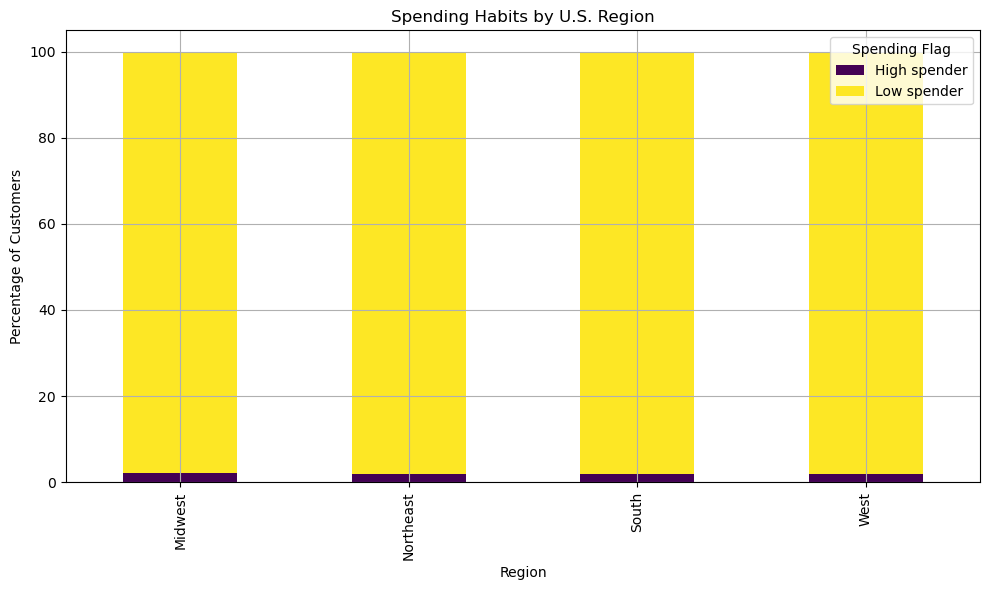

In [11]:
region_spending.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Spending Habits by U.S. Region')
plt.xlabel('Region')
plt.ylabel('Percentage of Customers')
plt.legend(title='Spending Flag', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# Create a crosstab of Region vs Spending Flag (actual counts)
region_spending_counts = pd.crosstab(df_full['Region'], df_full['spending_flag'])

# View the table
print(region_spending_counts)

spending_flag  High spender  Low spender
Region                                  
Midwest              155975      7441350
Northeast            108225      5614511
South                209691     10582194
West                 160354      8132559


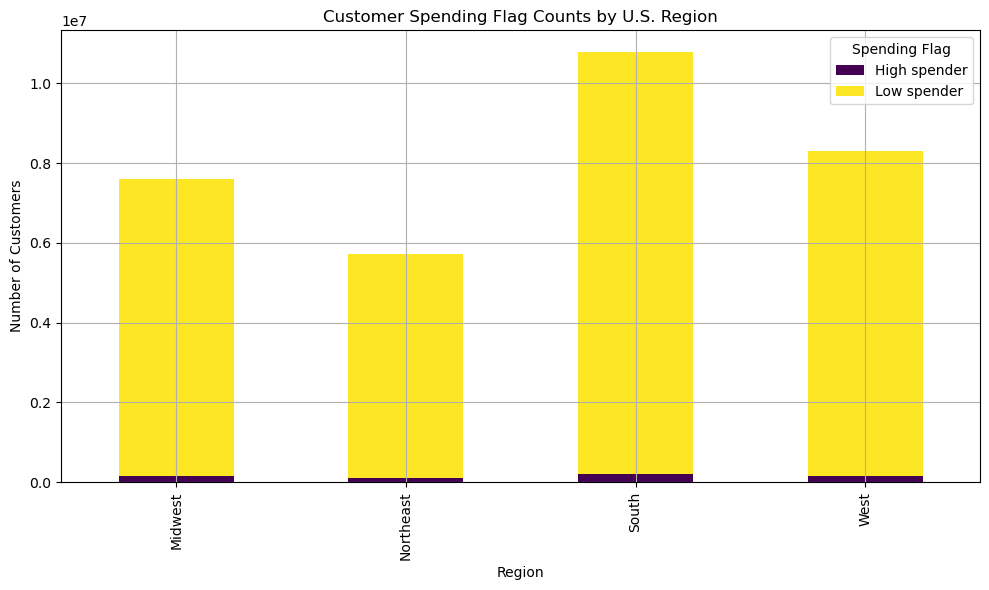

In [13]:
# Plot the actual counts
region_spending_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.title('Customer Spending Flag Counts by U.S. Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.legend(title='Spending Flag', loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

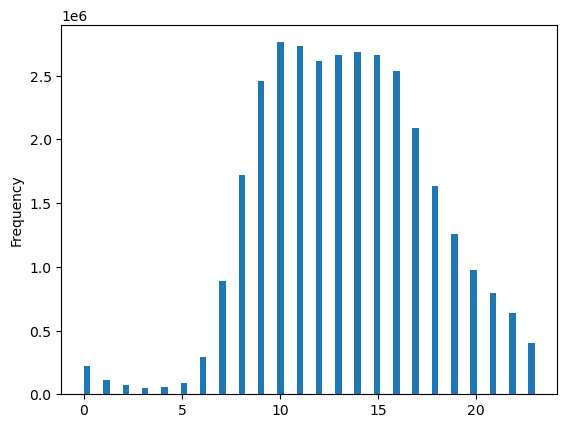

In [21]:
hist = df_full['hour_of_the_day_for_order'].plot.hist(bins = 70)

In [22]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visulisations ', 'Hist_HOD.png'))

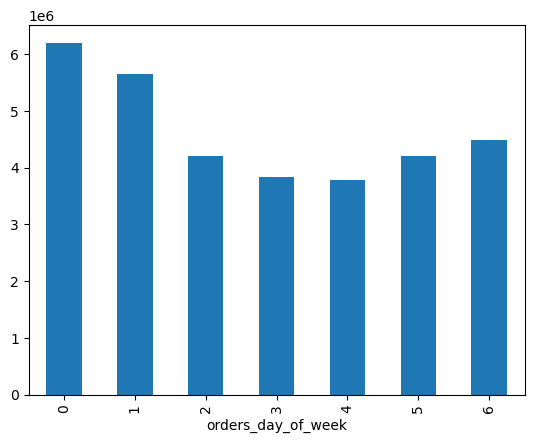

In [23]:
bar = df_full['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [24]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visulisations ', 'Bar_DOW.png'))

In [26]:
# Count number of product orders per department
dept_counts = df_full['department_id'].value_counts().sort_values(ascending=False)

In [27]:
# Department ID to name mapping (corrected)
dept_map = {
    1: 'frozen', 2: 'other', 3: 'bakery', 4: 'produce', 5: 'alcohol',
    6: 'international', 7: 'beverages', 8: 'pets', 9: 'dry goods pasta',
    10: 'bulk', 11: 'personal care', 12: 'meat seafood', 13: 'pantry',
    14: 'breakfast', 15: 'canned goods', 16: 'dairy eggs', 17: 'household',
    18: 'babies', 19: 'snacks', 20: 'deli', 21: 'missing'
}

# Replace ID with names
dept_counts_named = dept_counts.rename(index=dept_map)

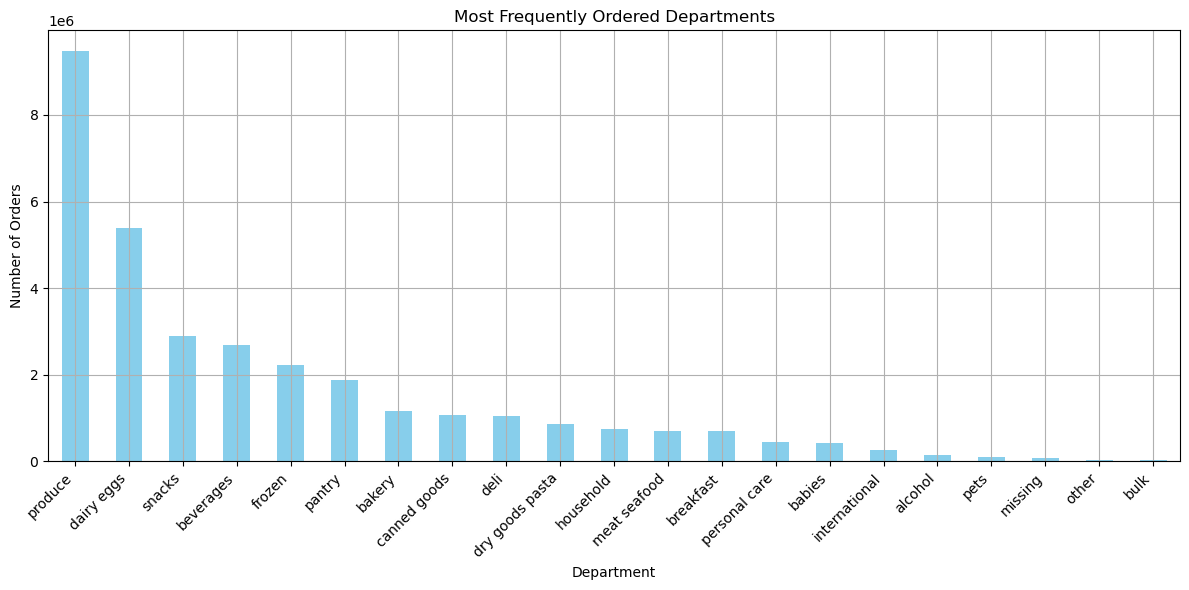

In [31]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot and assign the bar plot to bar2
bar2 = dept_counts_named.plot(kind='bar', color='skyblue', ax=ax)

# Add labels and formatting
ax.set_title('Most Frequently Ordered Departments')
ax.set_xlabel('Department')
ax.set_ylabel('Number of Orders')
ax.set_xticklabels(bar2.get_xticklabels(), rotation=45, ha='right')
ax.grid(True)

plt.tight_layout()
plt.show()

In [32]:
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visulisations ', 'Bar_Department-2.png'))

In [33]:
# Define a function to classify price
def get_price_range(price):
    if price < 5:
        return 'Low'
    elif price <= 15:
        return 'Mid'
    else:
        return 'High'

# Apply function to create a new column
df_full['price_range'] = df_full['prices'].apply(get_price_range)

In [34]:
df_full['price_range'].value_counts()

price_range
Mid     22086764
Low      9900417
High      417678
Name: count, dtype: int64

/var/folders/6f/z74bwdfn6vx8wrhly3w_vtcm0000gn/T/ipykernel_32695/2113538256.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar3 = sns.countplot(data=df_full, x='price_range', order=['Low', 'Mid', 'High'], palette='Set2')


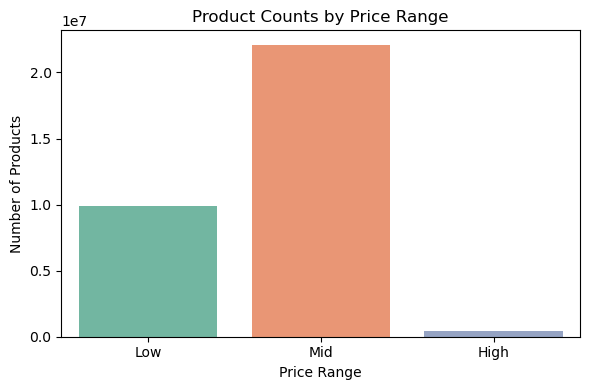

In [37]:
# Step 1: Create the figure
plt.figure(figsize=(6,4))

# Step 2: Assign the countplot to a variable
bar3 = sns.countplot(data=df_full, x='price_range', order=['Low', 'Mid', 'High'], palette='Set2')

# Step 3: Add labels and formatting
bar3.set_title('Product Counts by Price Range')
bar3.set_xlabel('Price Range')
bar3.set_ylabel('Number of Products')
plt.tight_layout()


In [38]:
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visulisations ', 'Bar_price_range.png'))

In [39]:
df_full['loyalty_flag'].value_counts(normalize=True).round(2) * 100

loyalty_flag
Regular customer    49.0
Loyal customer      32.0
New customer        19.0
Name: proportion, dtype: float64

/var/folders/6f/z74bwdfn6vx8wrhly3w_vtcm0000gn/T/ipykernel_32695/509142068.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_full, x='loyalty_flag', palette='Pastel1')


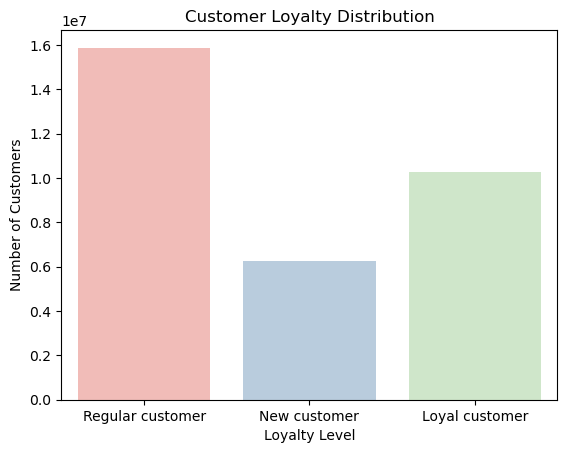

In [40]:
sns.countplot(data=df_full, x='loyalty_flag', palette='Pastel1')
plt.title('Customer Loyalty Distribution')
plt.xlabel('Loyalty Level')
plt.ylabel('Number of Customers')
plt.show()

In [41]:
df_full.groupby('loyalty_flag')[['prices', 'median_days', 'order_number']].mean().round(2)

,prices,median_days,order_number
loyalty_flag,,,
Loyal customer,10.39,5.17,32.64
New customer,13.29,18.46,3.81
Regular customer,12.50,10.61,12.35


In [42]:
df_full.groupby('Region')[['prices', 'order_number']].mean().round(2)

,prices,order_number
Region,,
Midwest,12.72,16.93
Northeast,11.55,17.22
South,12.20,17.15
West,11.32,17.28


/var/folders/6f/z74bwdfn6vx8wrhly3w_vtcm0000gn/T/ipykernel_32695/345369682.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_full, x='fam_status', y='age', palette='Set3')


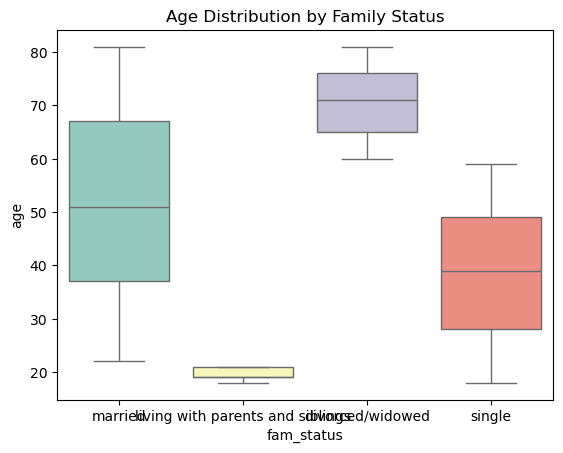

In [43]:
sns.boxplot(data=df_full, x='fam_status', y='age', palette='Set3')
plt.title('Age Distribution by Family Status')
plt.show()

In [44]:
df_full.groupby('fam_status')['order_number'].mean().round(2)

fam_status
divorced/widowed                    17.28
living with parents and siblings    17.30
married                             17.09
single                              17.26
Name: order_number, dtype: float64

In [48]:
df_full.groupby('Region')['prices'].mean().round(2)

Region
Midwest      12.72
Northeast    11.55
South        12.20
West         11.32
Name: prices, dtype: float64

/var/folders/6f/z74bwdfn6vx8wrhly3w_vtcm0000gn/T/ipykernel_32695/1256008340.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_full, x='Region', y='prices', ci=None, palette='Set2')
/var/folders/6f/z74bwdfn6vx8wrhly3w_vtcm0000gn/T/ipykernel_32695/1256008340.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_full, x='Region', y='prices', ci=None, palette='Set2')


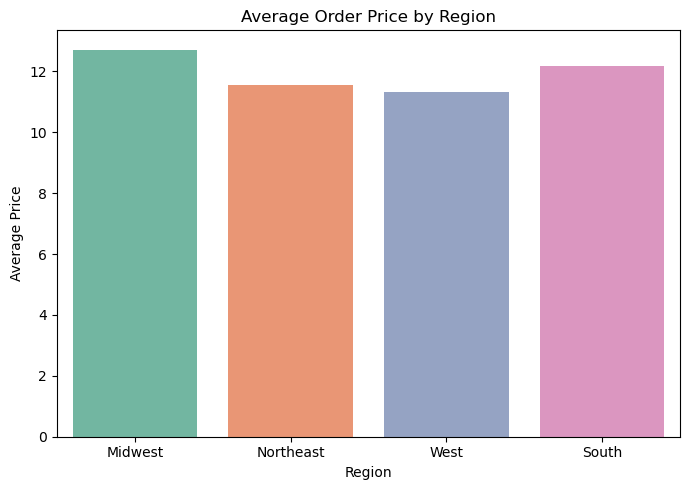

In [49]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_full, x='Region', y='prices', ci=None, palette='Set2')
plt.title('Average Order Price by Region')
plt.ylabel('Average Price')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

In [50]:
df_full.groupby('fam_status')['max_order'].mean().round(1)

fam_status
divorced/widowed                    33.3
living with parents and siblings    33.5
married                             32.9
single                              33.3
Name: max_order, dtype: float64

/var/folders/6f/z74bwdfn6vx8wrhly3w_vtcm0000gn/T/ipykernel_32695/3260908066.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_full, x='fam_status', y='max_order', ci=None, palette='Pastel2')
/var/folders/6f/z74bwdfn6vx8wrhly3w_vtcm0000gn/T/ipykernel_32695/3260908066.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_full, x='fam_status', y='max_order', ci=None, palette='Pastel2')


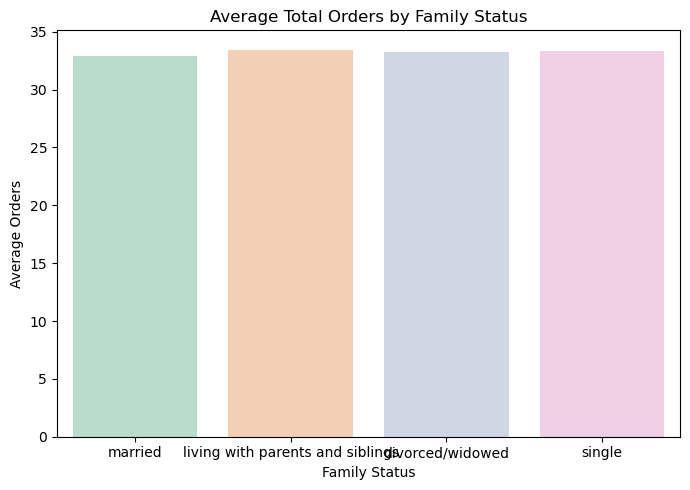

In [51]:
plt.figure(figsize=(7,5))
sns.barplot(data=df_full, x='fam_status', y='max_order', ci=None, palette='Pastel2')
plt.title('Average Total Orders by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Average Orders')
plt.tight_layout()
plt.show()

In [52]:
df_full['income_group'] = pd.cut(df_full['income'],
                                 bins=[0, 40000, 80000, 120000, 160000, 200000],
                                 labels=['0–40k', '40k–80k', '80k–120k', '120k–160k', '160k–200k'])

/var/folders/6f/z74bwdfn6vx8wrhly3w_vtcm0000gn/T/ipykernel_32695/2513535548.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_orders_by_income = df_full.groupby('income_group')['max_order'].sum().reset_index()
/var/folders/6f/z74bwdfn6vx8wrhly3w_vtcm0000gn/T/ipykernel_32695/2513535548.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_orders_by_income, x='income_group', y='max_order', palette='Greens_d')


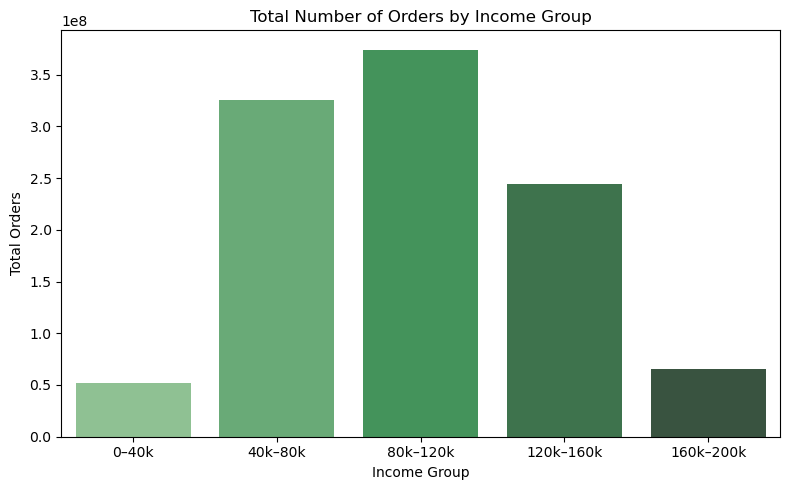

In [53]:
total_orders_by_income = df_full.groupby('income_group')['max_order'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=total_orders_by_income, x='income_group', y='max_order', palette='Greens_d')
plt.title('Total Number of Orders by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Total Orders')
plt.tight_layout()
plt.show()

In [54]:
df_full['age_group'] = pd.cut(df_full['age'],
                              bins=[0, 30, 45, 60, 100],
                              labels=['18–30', '31–45', '46–60', '60+'])

/var/folders/6f/z74bwdfn6vx8wrhly3w_vtcm0000gn/T/ipykernel_32695/2117100445.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_full, x='age_group', y='max_order', estimator='mean', ci=None, palette='Blues_d')
/var/folders/6f/z74bwdfn6vx8wrhly3w_vtcm0000gn/T/ipykernel_32695/2117100445.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_full, x='age_group', y='max_order', estimator='mean', ci=None, palette='Blues_d')


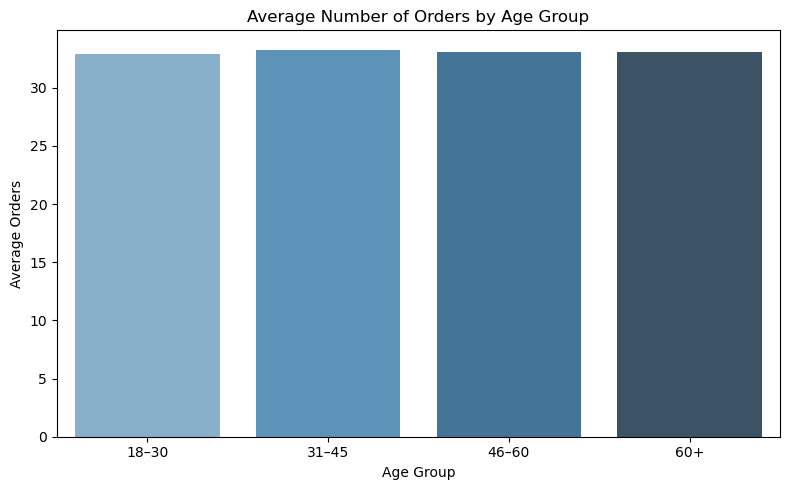

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_full, x='age_group', y='max_order', estimator='mean', ci=None, palette='Blues_d')
plt.title('Average Number of Orders by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Orders')
plt.tight_layout()
plt.show()